In [1]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [2]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv', encoding='utf-8')
train_y = pd.read_csv('train_y.csv', encoding = 'utf-8')
test_x = pd.read_csv('test_x.csv', encoding='utf-8')
test_y = pd.read_csv('test_y.csv', encoding='utf-8')

---

In [3]:
train_x.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1
0,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,270.0,...,2000,-6.9,-1.0,-0.8,0.3,1.6,1,1,1,25.0
1,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,270.0,...,2000,-7.1,-1.1,-0.8,0.3,1.6,1,1,2,27.0
2,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,1.1,250.0,...,2000,-7.3,-1.2,-0.9,0.3,1.6,1,1,3,23.0
3,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,0.0,0.3,0.0,...,2000,-7.5,-1.3,-1.0,0.2,1.5,1,1,4,24.0
4,0.002,0.7,0.003,0.037,26.0,16.0,-9.7,0.0,1.9,20.0,...,2000,-7.6,-1.3,-1.0,0.2,1.5,1,1,5,26.0


In [4]:
train_y.head()

,PM10_1
0,27.0
1,23.0
2,24.0
3,26.0
4,27.0


#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [5]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(train_x, train_y)


LinearRegression()

In [6]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(test_x)


In [7]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('MSE :', mse(test_y, y_pred_LR))
print('R2 :', r2_score(test_y, y_pred_LR))

MSE : 36.79707567308504
R2 : 0.9334516342743232


In [8]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model, 'model.pkl')



['model.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [9]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = RFR()
model.fit(train_x, train_y)

C:\Users\user\AppData\Local\Temp\ipykernel_12408\2563407116.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


RandomForestRegressor()

In [10]:
# Test 데이터로 성능을 평가해보세요.
y_pred_rf = model.predict(test_x)
print('MSE :', mse(test_y, y_pred_rf))
print('R2 :', r2_score(test_y, y_pred_rf))

MSE : 39.96143416419362
R2 : 0.9277288184716677


In [11]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, 'model_RF.pkl')


['model_RF.pkl']

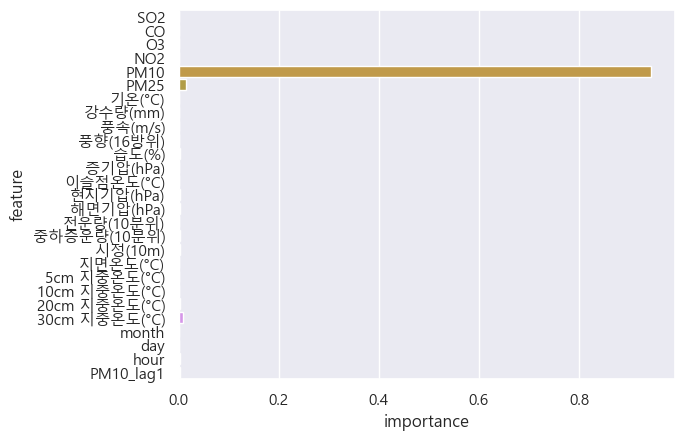

In [15]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

df_rf = pd.DataFrame()
df_rf['importance'] = model.feature_importances_
df_rf['feature'] = test_x.columns

sns.barplot(x='importance', y='feature', data=df_rf)
plt.show()

In [11]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [16]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = GBR()
model.fit(train_x, train_y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [23]:
# Test 데이터로 성능을 평가해보세요.
y_pred_gbr = model.predict(test_x)
print('RMSE :', mse(test_y, y_pred_gbr,squared=False))
print('R2 :', round(r2_score(test_y, y_pred_gbr),5))

RMSE : 6.622949376392406
R2 : 0.92067


In [18]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model, 'model_GBR.pkl')



['model_GBR.pkl']

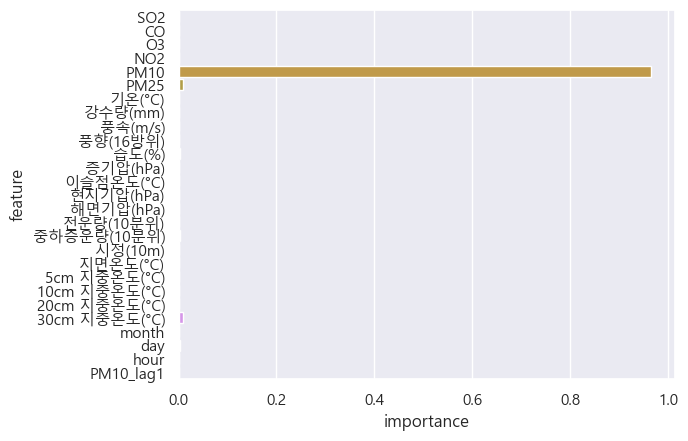

In [19]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
df_gbr = pd.DataFrame()
df_gbr['importance'] = model.feature_importances_
df_gbr['feature'] = test_x.columns

sns.barplot(x='importance', y='feature', data=df_gbr)
plt.show()

In [16]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [25]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(train_x, train_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3958
[LightGBM] [Info] Number of data points in the train set: 8759, number of used features: 27
[LightGBM] [Info] Start training from score 38.785478


LGBMRegressor()

In [26]:
# Test 데이터로 성능을 평가해보세요.
y_pred_lgbm = model.predict(test_x)
print('RMSE :', mse(test_y, y_pred_lgbm,squared=False))
print('R2 :', round(r2_score(test_y, y_pred_lgbm),5))

RMSE : 6.115333277714628
R2 : 0.93237


In [19]:
# 학습한 모델을 파일로 저장해보세요.




In [20]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



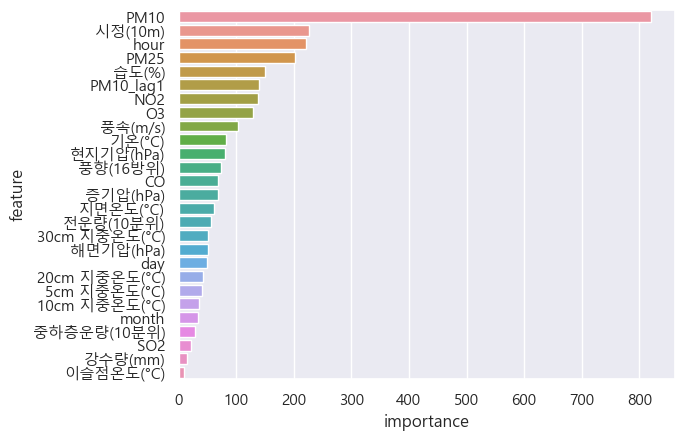

In [29]:
# Feature의 중요도 확인
df_lgbm = pd.DataFrame()
df_lgbm['importance'] = model.feature_importances_
df_lgbm['feature'] = test_x.columns
df_lgbm.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=df_lgbm)
plt.show()

In [30]:
y_pred_lgbm[:5]

array([22.27860792, 20.84994624, 20.5456709 , 20.08377878, 24.24813928])

In [31]:
test_y[:5]

,PM10_1
0,20.0
1,20.0
2,19.0
3,24.0
4,19.0


In [22]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

